In [2]:
import numpy as np
np.random.seed(42) # for reproducibility
from keras.datasets import mnist
from keras.utils import to_categorical
import pylab as plt
import matplotlib.cm as cm

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# What does the data look like?
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


label :  8


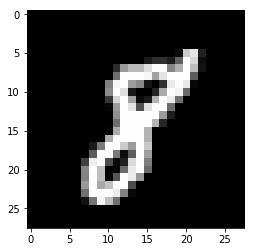

In [3]:
# x_train is 60,000 images, so let's look at one of the images
i = np.where(y_train==8)[0][0]
print("label : ", y_train[i])
sample = x_train[i, ...]
sample.shape
plt.imshow(sample, cmap=cm.gray)
plt.show()

In [4]:
# the data should be in a flat array for each sample, so we will reshape from 28 * 28 to 784
x_train = x_train.reshape(60000,28*28)
print(x_train.shape)

# We will one-hot encode the labels
y_train = to_categorical(y_train)

(60000, 784)


In [5]:
print(y_train.shape)
print("label : ", y_train[i, :])
print(np.argmax(y_train, axis = 1).shape)

(60000, 10)
label :  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(60000,)


In [6]:
# ok now let's get a cross-validation set from the training data.
from sklearn.model_selection import train_test_split
x_train_part, x_train_val, y_train_part, y_train_val = \
    train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=np.argmax(y_train, axis=1))

print(x_train.shape)

(60000, 784)


In [103]:
# now we will define the logistic regression classification model.
from keras import models
from keras import layers
from keras import optimizers
from keras import initializers


###### CHANGED 16 HIDDEN NODES TO 100 (AND 400)
model1 = models.Sequential()
model1.add(layers.Dense(100, activation='relu'
                        #, kernel_initializer=initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42)
                        #, bias_initializer='zeros'
                        , input_shape=(784,)))
model1.add(layers.Dense(10, activation='softmax'))

#compile the model
model1.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [104]:
# now fit the model...
eps = 25
history = model1.fit(x_train_part,
                    y_train_part,
                    batch_size=64,
                    epochs=eps,
                    verbose=0,
                    validation_data=(x_train_val, y_train_val))

print("training accuracy: {}".format(history.history['acc'][-1]))
print("validation accuracy: {}".format(history.history['val_acc'][-1]))

training accuracy: 0.9286458333333333
validation accuracy: 0.9335


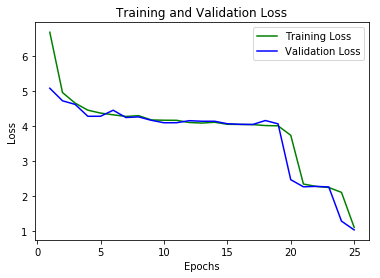

In [105]:
# plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

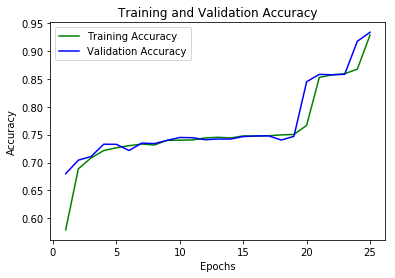

In [106]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [107]:

# That wasn't too bad.  Over 80% accuracy.  Let's look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model1.predict(x_test.reshape(10000, 28*28))
print(np.argmax(y_pred, axis = 1).shape)
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

(10000,)


array([[ 965,    0,    1,    3,    0,    1,    7,    1,    2,    0],
       [   3, 1118,    5,    1,    0,    1,    3,    1,    3,    0],
       [   9,    0,  986,    9,    4,    0,    7,    4,   12,    1],
       [   6,    4,   23,  927,    2,   11,    2,   13,   18,    4],
       [   0,    2,    4,    0,  945,    0,    9,    1,    5,   16],
       [   8,    2,    1,   80,    3,  770,   11,    2,   11,    4],
       [  12,    2,    0,    2,    6,    5,  924,    0,    7,    0],
       [   3,   12,   21,   14,    4,    1,    0,  947,    6,   20],
       [   9,    8,    4,   45,    5,    2,    5,    2,  894,    0],
       [   2,    7,    0,   22,   32,    4,    1,    8,   18,  915]])

In [108]:
print(classification_report(y_test, y_pred_test))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97       980
          1       0.97      0.99      0.98      1135
          2       0.94      0.96      0.95      1032
          3       0.84      0.92      0.88      1010
          4       0.94      0.96      0.95       982
          5       0.97      0.86      0.91       892
          6       0.95      0.96      0.96       958
          7       0.97      0.92      0.94      1028
          8       0.92      0.92      0.92       974
          9       0.95      0.91      0.93      1009

avg / total       0.94      0.94      0.94     10000



In [127]:
# Two hidden layers.
model2 = models.Sequential()
model2.add(layers.Dense(50, activation='relu', input_shape=(784,)))
model2.add(layers.Dense(500, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

#compile the model
model2.compile(optimizer="rmsprop",
    #optimizer=optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [128]:
# now fit the model...
eps = 100
history2 = model2.fit(x_train_part,
                    y_train_part,
                    batch_size=1024,
                    verbose=0,
                    epochs=eps,
                    validation_data=(x_train_val, y_train_val))
print("training accuracy: {}".format(history2.history['acc'][-1]))
print("validation accuracy: {}".format(history2.history['val_acc'][-1]))

training accuracy: 0.9972083331743876
validation accuracy: 0.9684166649182637


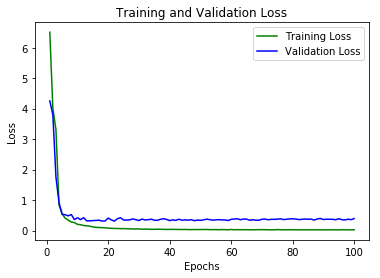

In [129]:
# plot the learning parameters
import matplotlib.pyplot as plt

history_dict = history2.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, eps + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

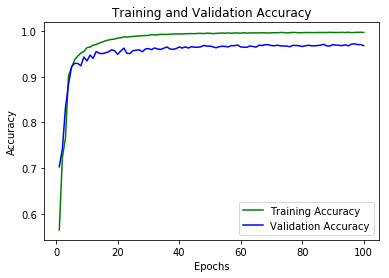

In [130]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [131]:
# That wasn't too bad.  Over 90% accuracy.  Let's look at the confusion
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model2.predict(x_test.reshape(10000, 28*28))
y_pred_test = np.argmax(y_pred, axis=1)

confusion_matrix(y_test, y_pred_test)

array([[ 969,    0,    0,    0,    0,    0,    3,    2,    6,    0],
       [   0, 1127,    2,    0,    0,    0,    1,    0,    5,    0],
       [  10,    1,  974,   16,    0,    1,    3,    8,   17,    2],
       [   1,    0,    6,  976,    0,    7,    1,    5,    9,    5],
       [   2,    1,    2,    0,  948,    0,    9,    2,    3,   15],
       [   5,    0,    0,   13,    2,  848,    9,    1,   10,    4],
       [   3,    2,    0,    1,    1,   11,  932,    1,    6,    1],
       [   1,    7,    7,   13,    2,    0,    1,  985,    5,    7],
       [   3,    0,    1,    3,    1,    5,    1,    4,  954,    2],
       [   6,    5,    0,    4,   10,    5,    0,    4,   10,  965]])

In [132]:
print(classification_report(y_test, y_pred_test))


             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.98      0.94      0.96      1032
          3       0.95      0.97      0.96      1010
          4       0.98      0.97      0.97       982
          5       0.97      0.95      0.96       892
          6       0.97      0.97      0.97       958
          7       0.97      0.96      0.97      1028
          8       0.93      0.98      0.95       974
          9       0.96      0.96      0.96      1009

avg / total       0.97      0.97      0.97     10000

